### 1. 서론


주택 가격에 대한 예측은 해당 지역의 특성 및 다양한 요인으로부터 영향을 받으며 이러한 부동산 분야에서의 빅데이터 활용은 점차 활발해지고 있다. 그 중 대표적으로 주택 가격의 시세 및 변동 예측이 있다. 본 연구는 미국 Connecticut 주 소속 Hartford시의 주택 가격 예측에 대한 분석을 실행했고  성능 및 요인들을 함께 비교분석했다. 

### 2. 데이터 수집 & 전처리

 JSON 형식으로 제공하는 Hartford시의 2835행과 20열의 데이터는  5개의 연속형 변수와 15개의 범주형 변수로 구성되어 있다. 해당 변수의 특징에 따른 결측값, 이상값 처리 및 더미변수 생성 이후 모형의 학습 및 성능 평가를 진행했다. 

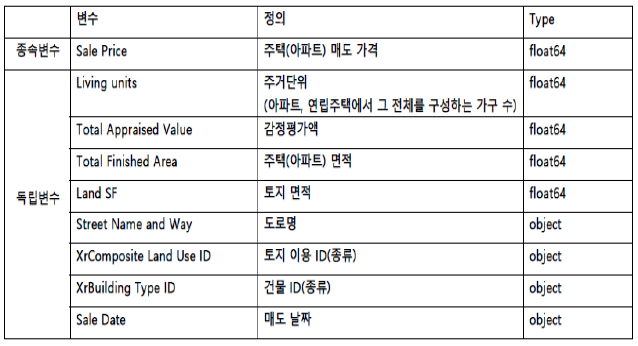

In [106]:
Image('경금 자료/최종변수.png')

In [29]:
df.head()

,landsf,totalfinishedarea,livingunits,saleprice,totalappraisedvalue,streetnameandway_ADAMS ST,streetnameandway_ADELAIDE ST,streetnameandway_AFFLECK ST,streetnameandway_AIRPORT RD,streetnameandway_ALBANY AVE,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,10000.0,4410.00000,2.0,255000.0,151700.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,7840.0,1200.00000,1.0,156000.0,135500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,6600.0,3087.00000,3.0,255000.0,185600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6600.0,3087.00000,3.0,255000.0,185600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6810.0,2846.40001,3.0,229000.0,162900.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3. 모형 설명

전처리가 완성된 데이터를 대상으로 일반적인 다중회귀, Lasso 회귀, Ridge 회귀, 그리고 ElasticNet 회귀 모형을 사용했다. 우선 예측에 있어서 다중회귀분석은 전통적인 회귀분석과 마찬가지로 데이터의 정규성이 충족되어야 한다. 또한, R2값이  높을수록 학습오차가 낮은 특징을 보인다. Lasso,Ridge,ElasticNet 회귀는 기존 회귀모형의 과대적합을 완화시키는 정규화 회귀 모형들이다. 본 연구에서는 그리드 서치를 통한 최적값으로 정규화 회귀 모형들의 규제 강도를 지정했다. 

그리고 트리 기반 알고리즘의 앙상블 모형 중 배깅에 해당하는 랜덤포레스트, 부스팅에 해당하는 그레이디언트 부스팅, XG-Boost를 사용했다. 모형들의 과적합을 방지하기 위해서 n_estimator, max_depth와 같은 기본적인 파라미터를 조정했다. 그 이후 수치형 변수 예측에 사용되는 4개의 평가지표 중 상대적으로 이상치에 덜 민감한  RMSE와 데이터의 단위의 덜 민감한 MAPE를 중심으로 모형들의 성능을 비교했다.  

### 4. 결과

종속변수인 saleprice와 나머지 설명변수를 통해서 회귀모형을 수립했다. 변수의 개수는 stepwise regression을 통해서 503개에서 77개로 축소했다. 이를 통해서 학습 오차의 감소, 설명변수의 영향력이 증가, 그리고 다중공선성의 완화를 확인했다. 나아가 학습 오차에 대한 정규성과 등분산성을 통한 회귀진단을 실시하고 회귀모형을 정규화 및 트리 기반 알고리즘으로 확장했다. 성능 평가는 학습 데이터에 대한 교차검증을 우선 시행하고 검증 데이터에 대한 성능 평가로 이어졌다. 첫 번째 모형인 다중회귀분석의 RMSE 값들은 상당히 불안정했으며 이것은 다중공선성으로 인한 과적합 문제라고 추측할 수 있었다. 반면, 나머지 모형들의 RMSE 값들은 모두 안정적이였다. 따라서 첫 번째 다중회귀분석 모형을 제외한 나머지 모형들로 검증 데이터에 대한 성능을 평가했다. 나아가 변수 중요도 분석을 실시했을 때 지역적 특징 뿐만 아니라 계절성 변수 등 다양한 요소도 골고루 나타났다. 

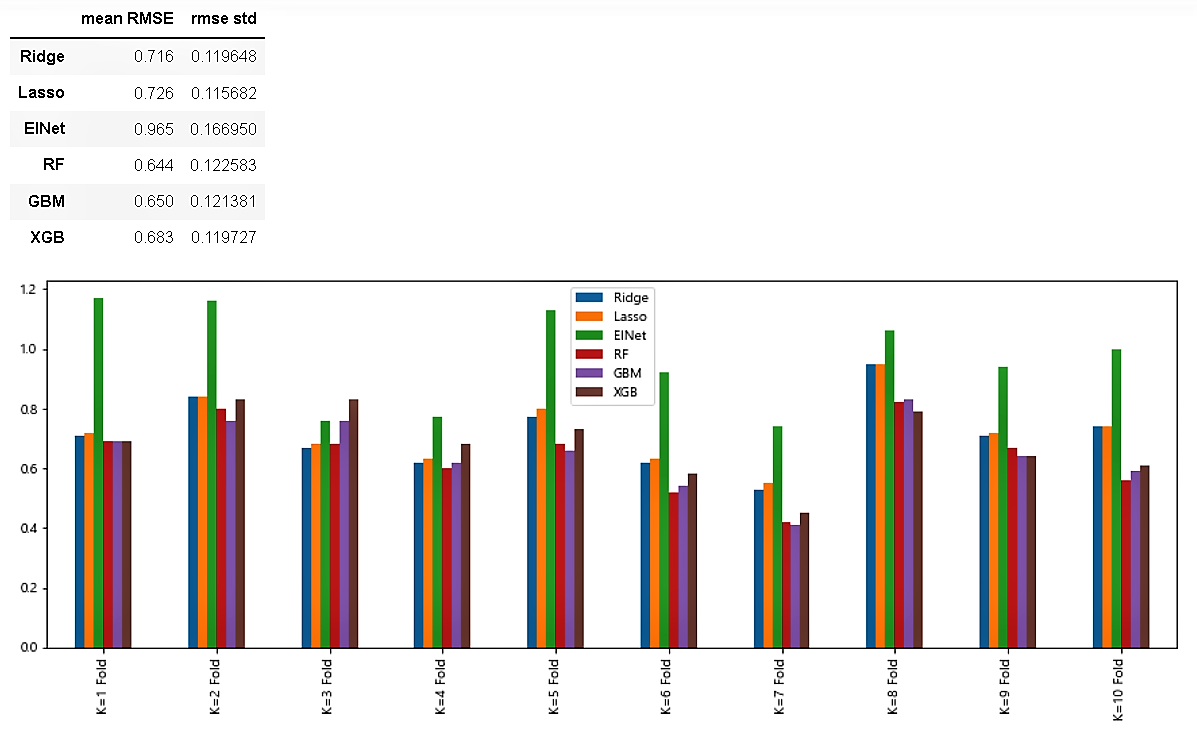

In [3]:
from IPython.display import Image
Image('경금 자료/성능.png')

In [46]:
for model in [Ridge_reg,Lasso_reg,elastic_net,rf_reg,gbm_reg,xgb_reg]: 
    get_model_predict(model,X_train2.values,X_test2.values,y_train.values,y_test.values)

-----------------------------------------------
Ridge
MSE:0.500000,RMSE:0.710000,MAE:0.450000,MAPE:3.880000
-----------------------------------------------
Lasso
MSE:0.480000,RMSE:0.700000,MAE:0.450000,MAPE:3.850000
-----------------------------------------------
ElasticNet
MSE:0.890000,RMSE:0.940000,MAE:0.640000,MAPE:5.240000
-----------------------------------------------
RandomForestRegressor
MSE:0.330000,RMSE:0.580000,MAE:0.330000,MAPE:2.820000
-----------------------------------------------
GradientBoostingRegressor
MSE:0.350000,RMSE:0.600000,MAE:0.320000,MAPE:2.750000
-----------------------------------------------
XGBRegressor
MSE:0.420000,RMSE:0.640000,MAE:0.340000,MAPE:2.930000


### 5. 결론

본 연구의 결론은 다음과 같다. 우선 최초의 회귀분석을 제외한 나머지 모형들에 대한 예측 성능의경건함을 사전 교차검증을 통해서 확인할 수 있었다. 또한 주택 가격 예측에 있어서 지역적 특성의 높은 중요도를 우선 알 수 있었다. 지역적 특성을 나타낸 변수는 streetnameandway였으며 특히 Ridge와 Lasso 회귀의 변수 중요도 분석에서 도로명 주소가 최상위권에 전부 포진되어 있었다. Ridge & Lasso를 제외한 나머지 모형들의 최상위권 중요 변수들의 특징은 획일적이지 않았고 비교적 다채로웠다. 특히 랜덤포레스트,GBM 그리고 XGBoost의 경우 계절성, 토지 이용 종류, 감정평가액, 도로명주소의 중요도가 어느 정도 균일하게 출력되었다. 

본 연구의 한계점은 먼저 부족한 데이터의 크기 문제가 있다. 해당 데이터는 2835개의 행에 불과하기 때문에 충분하지 못한 학습이 이루어졌다는 우려가 있다. 또한, 범주형 변수에 대한 더미변수 변환을 시행했을 때, 기존에 지역 및 건물 특성의 변수들이 가장 많았기 때문에 이들이 변수 중요도 분석에서 상위권에 포진된 경향이 있었다. 해당 특성들은 매우 단편적인 면에서 간결한 장점은 있지만 오히려 주택 가격 예측의 성능에 있어서 상대적인 단점으로 나타났다. 또한, 수치형 변수만으로 주택 가격을 예측하는 데에 한계가 있었다. 대표적 예시로 중요 변수로 나온 지역소속 아파트 주민들의 불만사항 등이 있었다.

주택 가격의 예측에서는 타 지역과의 비교 역시 중요하다. 따라서 다른 인접 도시의 주택 가격 데이터를 함께 활용해서 해석력과 설득력을 높일 수 있을 것으로 기대한다. 또한, 변수 중요도 분석에서의 다양한 특성 중 감정평가액의 높은 순위를 통해서 부동산 특성 변수의 수집 역시 예측 뿐만 아니라 부동산 시장의 흐름을 함께 보여줄 수 있을 것으로 예상한다. 마지막으로 수치형 및 범주형 변수가 아닌, 텍스트 형식 등의 다양한 종류의 데이터를 수집해서  데이터 활용의 한계를 보완할 수 있다. 

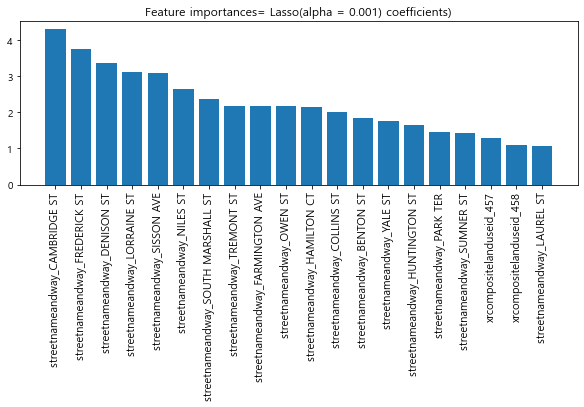

In [2]:
Image('경금 자료/lasso.png')

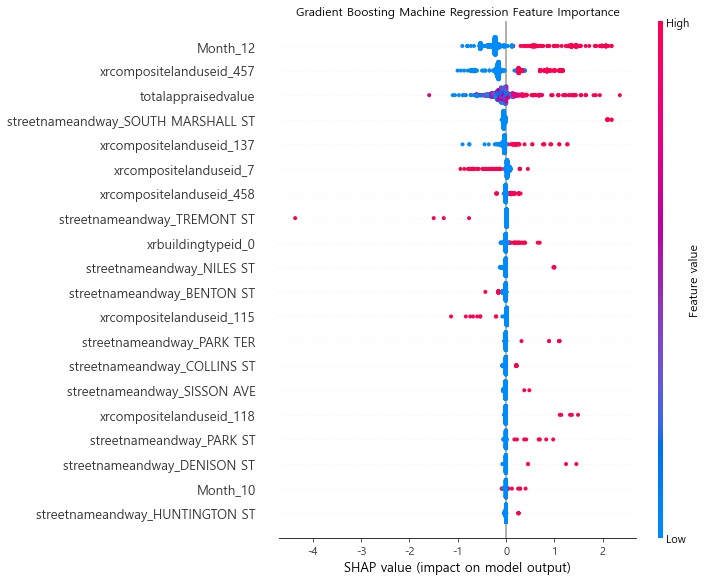

In [3]:
Image('경금 자료/gbm.png')